In [19]:
import pandas as pd
import sympy as sym
import numpy as np
import random 
import statistics as st
import seaborn as sns


dataSet = pd.read_csv("BillPaymentPrediction.csv")
pd.DataFrame.rename(dataSet,columns={'default.payment.next.month':'Payment'}, inplace =True)
dataSet = dataSet .drop(labels= "ID", axis = 1)
dataSet.head()
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [20]:
columnsWithOutliers = ['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',  'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for column in dataSet.columns:
    meanOfCol = st.mean(dataSet[column])
    StdOfCol = st.stdev(dataSet[column])
    upperLimit = meanOfCol + 3*StdOfCol
    lowerLimit = meanOfCol - 3*StdOfCol
    dataSet = dataSet[ (dataSet[column] >= lowerLimit) & (dataSet[column] <=upperLimit) ]

for column in dataSet.columns:
     if column not in ['Payment', 'SEX']:
        dataSet[column] = (dataSet[column]-st.mean(dataSet[column]))/(st.stdev(dataSet[column]))


In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture as GMM
from sklearn.tree import DecisionTreeClassifier 
from sklearn.cluster import KMeans

inputData = dataSet
yData = inputData['Payment']
xData = (inputData.loc[:, inputData.columns != 'Payment'])

# xTrain, xTest, yTrain, yTest = train_test_split(xData , yData, test_size = 0.3, random_state = 1234,shuffle = True)

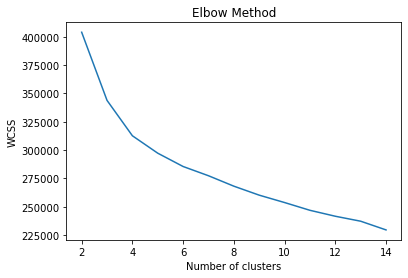

In [9]:
wcss = []
for cluster in range(2, 15):
    kmeans = KMeans(n_clusters=cluster, max_iter=300)
    kmeans.fit(xData)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
sil_score = []
for k in range(2,10):
    kmeans = KMeans( n_clusters=k, n_init=100 ).fit(xData)
    yPred = kmeans.fit_predict(xData)
    sil_score.append(silhouette_score(xData, yPred ))

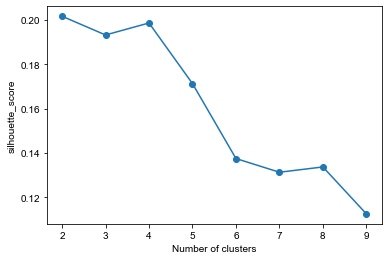

In [11]:
plt.plot(range(2, 10), sil_score, marker ='o')
# plt.title('Elbow Method')
plt.xlabel('Number of clusters')
sns.set_style("whitegrid")
plt.ylabel('silhouette_score')
plt.show()

In [12]:
# Expectation Maximisation
em_sil_score = []
for k in range(2,10):
    gmmClassifier = GMM(n_components=k).fit(xData)
    gmmYPred = gmmClassifier.predict(xData)
    em_sil_score.append(silhouette_score( xData,gmmYPred ))

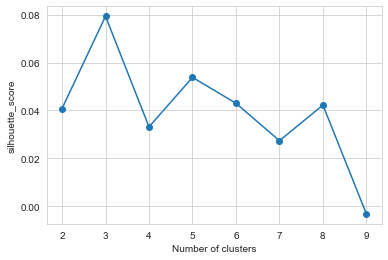

In [13]:
plt.plot(range(2, 10), em_sil_score,marker ='o')
# plt.title('Elbow Method')
plt.xlabel('Number of clusters')
sns.set_style("whitegrid")
plt.ylabel('silhouette_score')
plt.show()

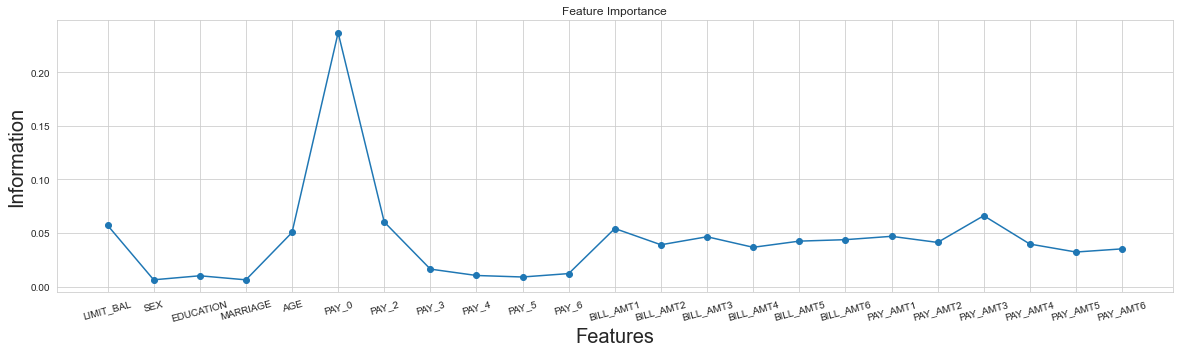

In [24]:
DTreeClassifier = DecisionTreeClassifier(criterion="entropy", max_depth= 15, max_features = 0.7)
DTreeClassifier = DTreeClassifier.fit(xData,yData)
bestFeatures=dict(zip(xData.columns, DTreeClassifier.feature_importances_.round(5)))
bestFeatures=pd.DataFrame(bestFeatures,index=['Importance']).T
plt.figure(figsize=(20,5))
plt.plot(bestFeatures,marker='o')
plt.xticks(rotation=15)
plt.title('Feature Importance')
plt.xlabel('Features',fontsize=20)
plt.ylabel('Information', fontsize = 20)
sns.set_style("whitegrid")
plt.show()

In [25]:
bestFeatures.sort_values(by='Importance', ascending = False).T

,PAY_0,PAY_AMT3,PAY_2,LIMIT_BAL,BILL_AMT1,AGE,PAY_AMT1,BILL_AMT3,BILL_AMT6,BILL_AMT5,...,BILL_AMT4,PAY_AMT6,PAY_AMT5,PAY_3,PAY_6,PAY_4,EDUCATION,PAY_5,SEX,MARRIAGE
Importance,0.2369,0.06618,0.0603,0.05725,0.05423,0.05052,0.04693,0.04653,0.04381,0.04245,...,0.03669,0.03523,0.03228,0.01634,0.01217,0.01039,0.01012,0.00898,0.00637,0.00633


In [26]:
decisionTreeData = pd.DataFrame()
decisionTreeData[["PAY_2", "PAY_0","BILL_AMT1", "LIMIT_BAL", "PAY_AMT2", "AGE"]]= xData [["PAY_2", "PAY_0","BILL_AMT1", "LIMIT_BAL", "PAY_AMT2", "AGE"]]

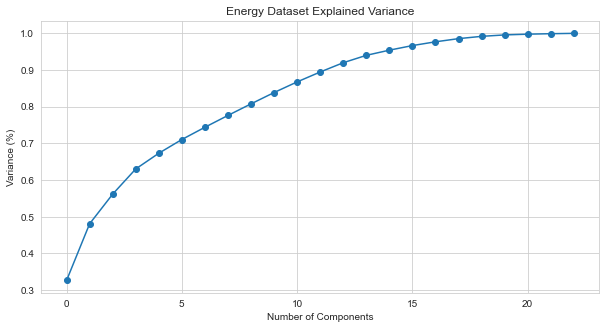

In [27]:
#PCA 
pca = PCA().fit(xData)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker = 'o')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
sns.set_style("whitegrid")
plt.title('Energy Dataset Explained Variance')
plt.show()

In [28]:
pca = PCA(n_components=15)
PrincipalComponents = pca.fit_transform(xData)
pcaData = pd.DataFrame(data = PrincipalComponents
             , columns = ['principalComponent1', 'principalComponent2','principalComponent3','principalComponent4','principalComponent5','principalComponent6','principalComponent7','principalComponent8','principalComponent9','principalComponent10', 
                          'principalComponent11', 'principalComponent12', 'principalComponent13', 'principalComponent14', 'principalComponent15'])

In [29]:
#ICA

ICA = FastICA(random_state=123)
icaFit= ICA.fit_transform(xData)
icaData = pd.DataFrame(data = icaFit
             , columns = xData.columns)

In [30]:
import scipy

ktICA= scipy.stats.kurtosis(icaData)
ktICAData = pd.DataFrame(ktICA)
ktICAData = ktICAData.T
ktICAData.columns = xData.columns
ktICAData = ktICAData.T

In [31]:
# Run when needed to reset
ktICAData.reset_index(inplace = True,drop=False)

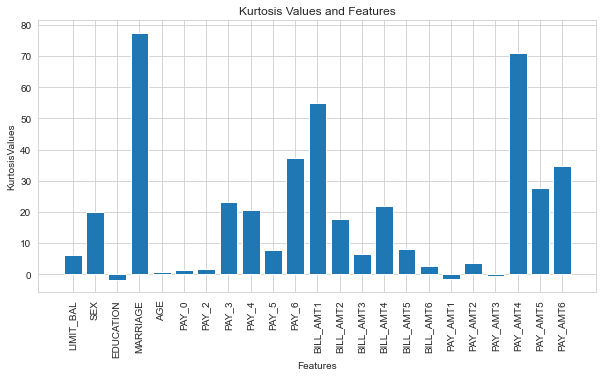

In [32]:
ktICAData.columns=['Features','Kurtosis_Values']
plt.figure(figsize=(10,5))
plt.bar(ktICAData['Features'],ktICAData['Kurtosis_Values'])
plt.xlabel('Features')
plt.ylabel('KurtosisValues')
plt.xticks(rotation=90)
sns.set_style("whitegrid")
plt.title('Kurtosis Values and Features')
plt.show()

In [33]:
icaDataFrame = pd.DataFrame()
icaDataFrame = icaData[icaData.columns.difference (['EDUCATION', 'PAY_AMT1', 'PAY_AMT3', 'AGE', 'PAY_0', 'PAY_2'])]


In [34]:
#RO
from sklearn import random_projection

roData = random_projection.GaussianRandomProjection(n_components=5)
roData = pd.DataFrame(roData.fit_transform(xData))

In [35]:
roData.columns=['RandomComponent1','RandomComponent2','RandomComponent3','RandomComponent4', 'RandomComponent5']

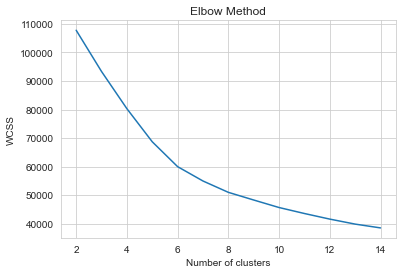

In [36]:
#Clustering after Dimension Reduction

#Kmeans after DT

wcss = []
for cluster in range(2, 15):
    kmeans = KMeans(n_clusters=cluster, max_iter=300)
    kmeans.fit(decisionTreeData)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:

dt_km_sil_score = []
for cluster in range(2,15):
    kmeans = KMeans(n_clusters=cluster, n_init=100 ).fit(decisionTreeData)
    yPred =  kmeans.fit_predict(decisionTreeData)
    dt_km_sil_score.append(silhouette_score(decisionTreeData, yPred ))

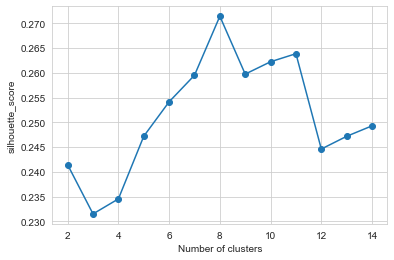

In [38]:
plt.plot(range(2,15), dt_km_sil_score,marker ='o')
plt.xlabel('Number of clusters')
sns.set_style("whitegrid")
plt.ylabel('silhouette_score')
plt.show()

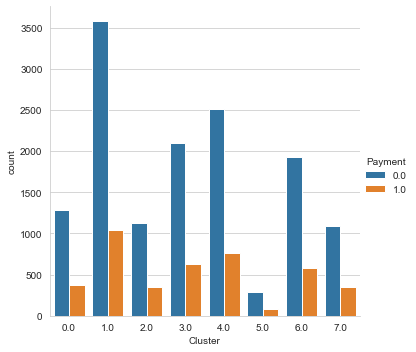

In [160]:
kmClassifierDT = KMeans(n_clusters = 8 , init='k-means++', max_iter=300, n_init=10, random_state=0)
yPredDT = kmClassifierDT.fit_predict(xData)
yPredDT =pd.DataFrame(yPredDT,columns=['Cluster'])
kmDataDT = pd.concat([xData,yData,yPredDT],axis=1)

sns.catplot(data=kmDataDT,kind='count',x='Cluster',hue='Payment')


In [67]:
#EX MAX DT

dt_em_sil_score = []
for comp in range(2,15):
    gmmClassifier = GMM(n_components = comp).fit(decisionTreeData)
    yPredGmmDT = gmmClassifier.predict(decisionTreeData)
    dt_em_sil_score.append(silhouette_score( decisionTreeData,yPredGmmDT ))

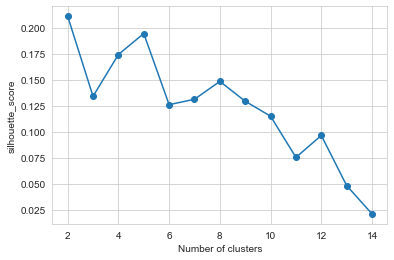

In [68]:
plt.plot(range(2, 15), dt_em_sil_score,marker ='o')
plt.xlabel('Number of clusters')
sns.set_style("whitegrid")
plt.ylabel('silhouette_score')
plt.show()

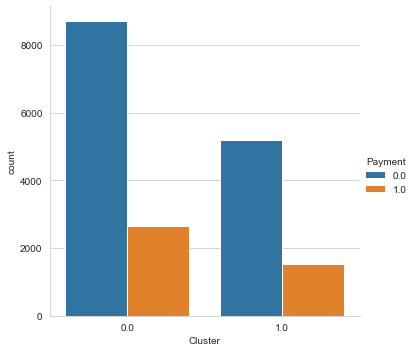

In [161]:
dt_gmm = GMM(n_components= 2).fit(decisionTreeData)
yPredEmDT = dt_gmm.predict(decisionTreeData)
yPredEmDT =pd.DataFrame(yPredEmDT,columns=['Cluster'])
EMDTData = pd.concat([decisionTreeData,yData,yPredEmDT],axis=1)

sns.catplot(data=EMDTData,kind='count',x='Cluster',hue='Payment')


In [69]:
#PCA KM

pca_km_sil_score = []
for k in range(2,15):
    kmeans = KMeans( n_clusters=k,n_init=100 ).fit(pcaData)
    yPredKM = kmeans.fit_predict(pcaData)
    pca_km_sil_score.append(silhouette_score( pcaData,yPredKM ))

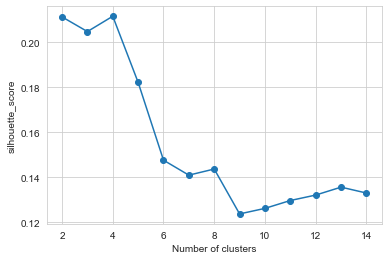

In [70]:
plt.plot(range(2, 15), pca_km_sil_score,marker ='o')
plt.xlabel('Number of clusters')
sns.set_style("whitegrid")
plt.ylabel('silhouette_score')
plt.show()

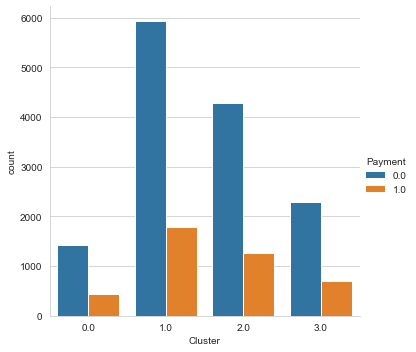

In [162]:
pcaKMClassifier = KMeans(n_clusters= 4, init='k-means++', max_iter=300, n_init=10, random_state=0)
yPredPCA = pcaKMClassifier.fit_predict(pcaData)
yPredPCA = pd.DataFrame(yPredPCA,columns=['Cluster'])
pcaKMData = pd.concat([pcaData,yData,yPredPCA],axis=1)

sns.catplot(data=pcaKMData,kind='count',x='Cluster',hue='Payment')


In [71]:
#PCA EM

pca_em_sil_score = []
for comp in range(2,15):
    gmm = GMM(n_components=comp).fit(pcaData)
    pcaYPred = gmm.predict(pcaData)
    pca_em_sil_score.append(silhouette_score( pcaData, pcaYPred ))

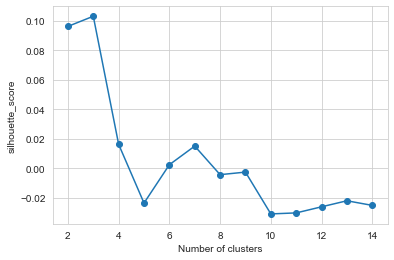

In [72]:
plt.plot(range(2, 15), pca_em_sil_score,marker ='o')
plt.xlabel('Number of clusters')
sns.set_style("whitegrid")
plt.ylabel('silhouette_score')
plt.show()

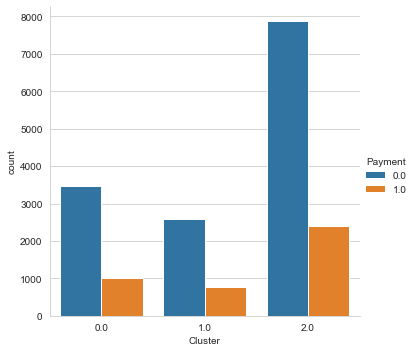

In [164]:
gmmPCAClassifier = GMM(n_components= 3).fit(pcaData)
pcaEMYPred = gmmPCAClassifier.predict(pcaData)
pcaEMYPred =pd.DataFrame(pcaEMYPred,columns=['Cluster'])
pcaEMData = pd.concat([pcaData,yData,pcaEMYPred],axis=1)

sns.catplot(data=pcaEMData,kind='count',x='Cluster',hue='Payment')


In [73]:
#ICA KM

ica_km_sil_score = []
for cluster in range(2,15):
    kmeansICA = KMeans( n_clusters=cluster, n_init=100 ).fit(icaDataFrame)
    icaKMYPred = kmeans.fit_predict(icaDataFrame)
    ica_km_sil_score.append(silhouette_score( icaDataFrame,icaKMYPred ))

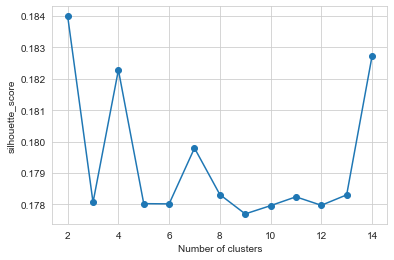

In [74]:
plt.plot(range(2, 15), ica_km_sil_score,marker ='o')
plt.xlabel('Number of clusters')
sns.set_style("whitegrid")
plt.ylabel('silhouette_score')
plt.show()

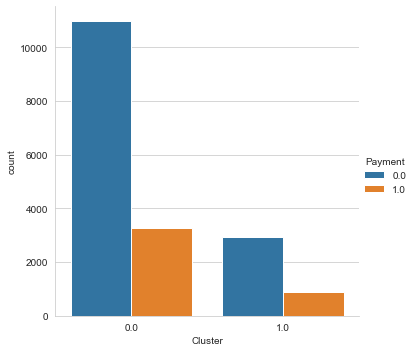

In [166]:
icaKMeans = KMeans(n_clusters= 2, init='k-means++', max_iter=300, n_init=10, random_state=5)
icaKMYPred = icaKMeans.fit_predict(icaDataFrame)
icaKMYPred =pd.DataFrame(icaKMYPred,columns=['Cluster'])
icaKMData = pd.concat([icaDataFrame,yData,icaKMYPred],axis=1)

sns.catplot(data=icaKMData,kind='count',x='Cluster',hue='Payment')


In [75]:
#ICA EM

ica_em_sil_score = []
for k in range(2,15):
    gmm = GMM(n_components=k).fit(icaDataFrame)
    icaYPred = gmm.predict(icaDataFrame)
    ica_em_sil_score.append(silhouette_score( icaDataFrame,icaYPred ))

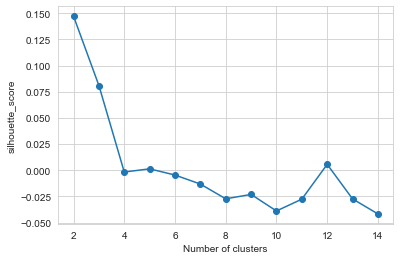

In [76]:
plt.plot(range(2, 15), ica_em_sil_score,marker ='o')
plt.xlabel('Number of clusters')
sns.set_style("whitegrid")
plt.ylabel('silhouette_score')
plt.show()

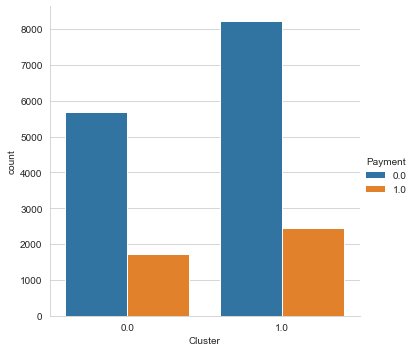

In [167]:
icaGMMClassifier = GMM(n_components= 2).fit(icaDataFrame)
icaEmYPred = icaGMMClassifier.predict(icaDataFrame)
icaEmYPred =pd.DataFrame(icaEmYPred,columns=['Cluster'])
icaEMData = pd.concat([icaDataFrame, yData, icaEmYPred],axis=1)

sns.catplot(data=icaEMData,kind='count',x='Cluster',hue='Payment')


In [77]:
# RO KM

ro_km_sil_score = []
for cluster in range(2,15):
    kmeans = KMeans( n_clusters=cluster, n_init=100 ).fit(roData)
    roYPred = kmeans.fit_predict(roData)
    ro_km_sil_score.append(silhouette_score( roData, roYPred ))

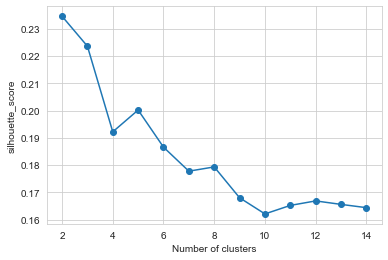

In [78]:
plt.plot(range(2, 15), ro_km_sil_score,marker ='o')
plt.xlabel('Number of clusters')
sns.set_style("whitegrid")
plt.ylabel('silhouette_score')
plt.show()

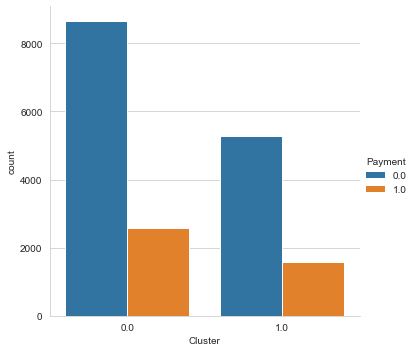

In [168]:
roKMeans = KMeans(n_clusters= 2, init='k-means++', max_iter=300, n_init=10, random_state=0)
roKMYPred = roKMeans.fit_predict(roData)
roKMYPred =pd.DataFrame(roKMYPred,columns=['Cluster'])
roKMData = pd.concat([roData,yData,roKMYPred],axis=1)

sns.catplot(data=roKMData,kind='count',x='Cluster',hue='Payment')


In [79]:
#RO EM

ro_em_sil_score = []
for comp in range(2,15):
    gmm = GMM(n_components=comp).fit(roData)
    roGMMYPred = gmm.predict(roData)
    ro_em_sil_score.append(silhouette_score( roData,roGMMYPred ))

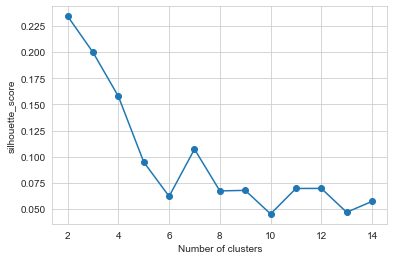

In [80]:
plt.plot(range(2, 15), ro_em_sil_score,marker ='o')
plt.xlabel('Number of clusters')
sns.set_style("whitegrid")
plt.ylabel('silhouette_score')
plt.show()

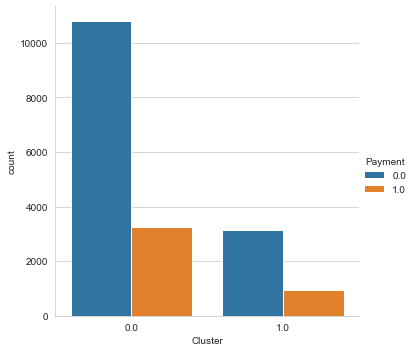

In [169]:
roGMM = GMM(n_components= 2).fit(roData)
roEMYPred = roGMM.predict(roData)
roEMYPred =pd.DataFrame(roEMYPred,columns=['Cluster'])
roEMData = pd.concat([roData,yData,roEMYPred],axis=1)

sns.catplot(data=roEMData,kind='count',x='Cluster',hue='Payment')


In [104]:
# ANN functions


from sklearn.neural_network import MLPClassifier
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import cross_val_score,learning_curve,train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import zero_one_loss
from sklearn.metrics import classification_report

@ignore_warnings(category=ConvergenceWarning)
def learningCurvePlots(classifier, xTrainData, yTrainData,folds,activationFunc):
    
       
    trainSizes, trainScores, testScores,fitTimes,_ = learning_curve(estimator = classifier, X= xTrainData, y= yTrainData,cv=folds,return_times=True)

    trainScoresMean = np.mean(trainScores, axis=1)
    trainScoresStd = np.std(trainScores, axis=1)
    testScoresMean = np.mean(testScores, axis=1)
    testScoresStd = np.std(testScores, axis=1)
    fitTimesMean= np.mean(fitTimes,axis=1)
    fitTimesStd= np.std(fitTimes,axis=1)

    _, axes = plt.subplots(1, 2, figsize=(20, 5))

    axes[0].grid()
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")
    axes[0].set_title("Learning Curves("+activationFunc+")")
    axes[0].fill_between(trainSizes, trainScoresMean - trainScoresStd,trainScoresMean + trainScoresStd, alpha=0.1, color="r")
    axes[0].fill_between(trainSizes, testScoresMean - testScoresStd,testScoresMean + testScoresStd, alpha=0.1, color="g")
    axes[0].plot(trainSizes, trainScoresMean, 'o-', color="r", label="Training score")
    axes[0].plot(trainSizes, testScoresMean, 'o-', color="g", label="Cross-validation score")
    axes[0].legend(loc="best")

    axes[1].grid()
    axes[1].set_xlabel("fit_times")
    axes[1].set_ylabel("Score")
    axes[1].set_title("Performance of the model")
    axes[1].fill_between(fitTimesMean, testScoresMean - testScoresStd, testScoresMean + testScoresStd, alpha=0.1)
    axes[1].plot(fitTimesMean,testScoresMean)
    
    return plt


@ignore_warnings(category=ConvergenceWarning)
def bestLayersAndFunction(layersList,numberOfLayers, xTrainData, yTrainData):
    annData = pd.DataFrame(columns=['HiddenLayers','ActivationFunc','Accuracy'])
    hiddenLayers = layersList
    for index in range(numberOfLayers):
        for actFunc in ['tanh','relu', 'logistic']:
            classifier = MLPClassifier(hidden_layer_sizes=hiddenLayers[index] ,activation=actFunc,learning_rate='constant')
            accuracy = (cross_val_score(classifier,xTrainData,yTrainData,cv=5).mean())*100
            annData = annData.append(dict(zip(annData.columns,[hiddenLayers[index], actFunc, accuracy])), ignore_index=True)
    return annData

@ignore_warnings(category=ConvergenceWarning)
def plotActivationVsAccuracy(annData,hiddenLayers,noOfLayers):
    for index in range(noOfLayers):
        groupedData = annData[annData['HiddenLayers']==hiddenLayers[index]]
        plt.plot(groupedData['ActivationFunc'], groupedData['Accuracy'] , '-o',label = hiddenLayers[index])
    plt.ylabel("Accuracy")
    plt.xlabel("Activation Function")
    plt.title("ActivationFunction vs Accuracy")
    plt.legend( title="HiddenLayers")
    return plt

<module 'matplotlib.pyplot' from 'c:\\users\\19722\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

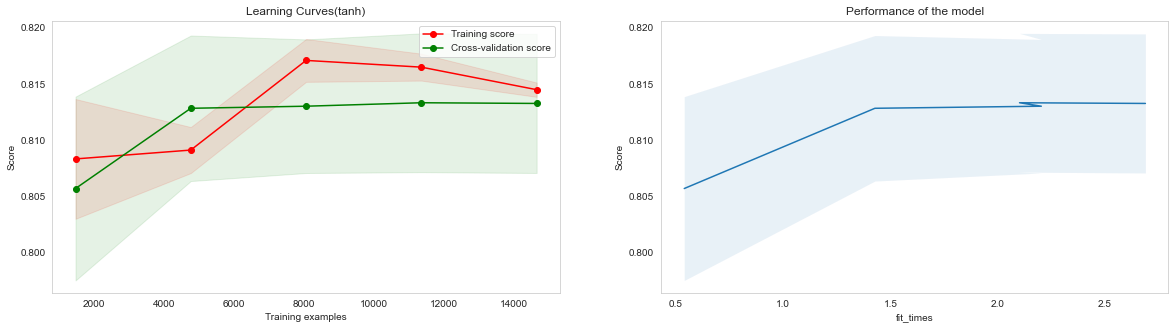

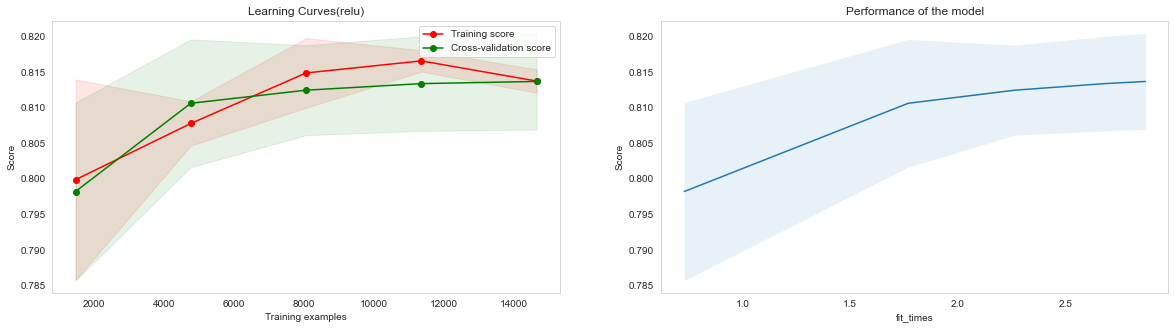

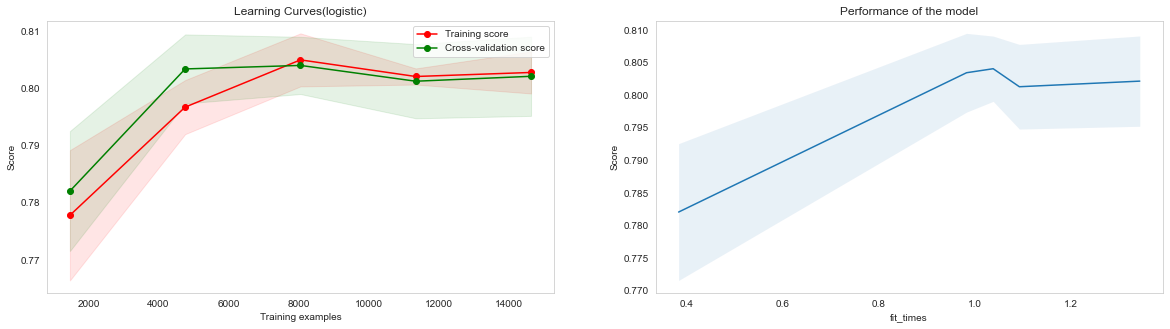

In [90]:
# ANN KM

xTrainDT, xTestDT, yTrainDT, yTestDT = train_test_split(decisionTreeData , yData, test_size = 0.3, random_state = 1234,shuffle = True)

clf = MLPClassifier(hidden_layer_sizes=(5,7,5),activation='tanh',learning_rate='constant')
clf2 = MLPClassifier(hidden_layer_sizes=(5,7,5),activation='relu',learning_rate='constant')
clf3 = MLPClassifier(hidden_layer_sizes=(5,7,5),activation='logistic',learning_rate='constant')

learningCurvePlots(clf, xTrainDT, yTrainDT, 10, 'tanh')
learningCurvePlots(clf2, xTrainDT, yTrainDT, 10, 'relu')
learningCurvePlots(clf3, xTrainDT, yTrainDT, 10, 'logistic')

In [89]:
hiddenLayers1 = [(10, 9, 8), (6, 7, 8, 9),(7, 8, 9, 10, 11)]
annData1 = bestLayersAndFunction(hiddenLayers1, 3, xTrainDT, yTrainDT)

hiddenLayers2 = [(15, 10, 12), (10, 7, 8, 9), (9, 10, 11)]
annData2 = bestLayersAndFunction(hiddenLayers2, 3, xTrainDT, yTrainDT)


<module 'matplotlib.pyplot' from 'c:\\users\\19722\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

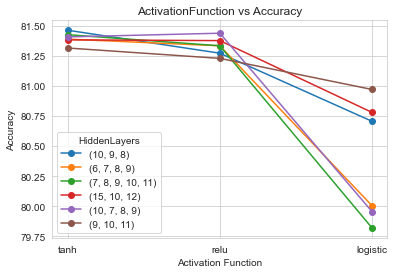

In [91]:
plotActivationVsAccuracy(annData1, hiddenLayers1, 3)
plotActivationVsAccuracy(annData2, hiddenLayers2, 3)

[81.33832022409851, 81.22772492227458, 81.2645723991363]


<module 'matplotlib.pyplot' from 'c:\\users\\19722\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

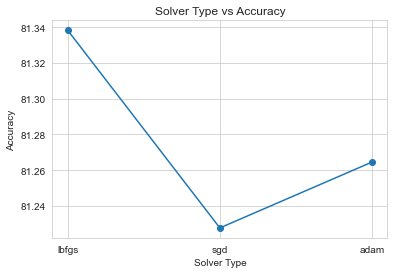

In [93]:
# activation - tanh
# hidden layers - (10, 9, 8)

@ignore_warnings(category=ConvergenceWarning)
def my_function():
    solverList = ['lbfgs', 'sgd', 'adam']
    accuracyValues = []
    for solverVal in solverList:
        clf = MLPClassifier(hidden_layer_sizes=(10, 9, 8), activation='tanh', solver = solverVal)
        accuracy = (cross_val_score(clf,xTrainDT,yTrainDT,cv=5).mean())*100
        accuracyValues.append(accuracy)
    print(accuracyValues)
    plt.plot(solverList, accuracyValues , '-o')
    plt.ylabel("Accuracy")
    plt.xlabel("Solver Type")
    plt.title("Solver Type vs Accuracy")
    return plt

my_function()

In [105]:
# activation - tanh
# hidden layers - (10, 9, 8)
# solver - lbfgs

finalClassifier = MLPClassifier(hidden_layer_sizes=(10, 9, 8), activation='tanh', solver = 'lbfgs')


finalClassifier.fit(xTrainDT,yTrainDT)
yPredDT = finalClassifier.predict(xTestDT)
error_rate = zero_one_loss(yTestDT, yPredDT,normalize = True)
print("Error Rate: "+str(error_rate))
print(confusion_matrix(yPredDT, yTestDT))
print(classification_report(yPredDT, yTestDT))


Error Rate: 0.19483870967741934
[[5074 1102]
 [ 257  542]]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      6176
           1       0.33      0.68      0.44       799

    accuracy                           0.81      6975
   macro avg       0.64      0.75      0.66      6975
weighted avg       0.88      0.81      0.83      6975



c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<module 'matplotlib.pyplot' from 'c:\\users\\19722\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

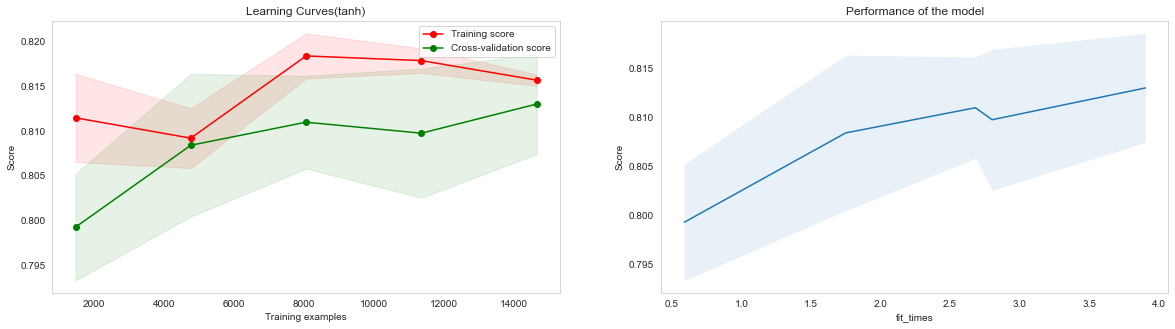

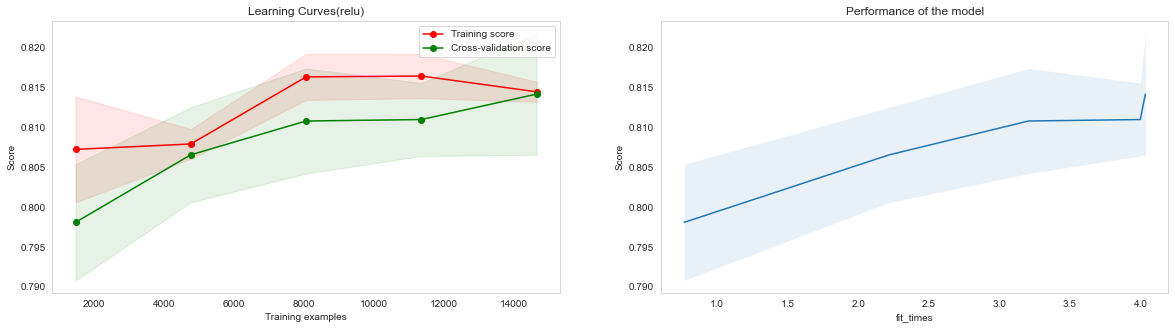

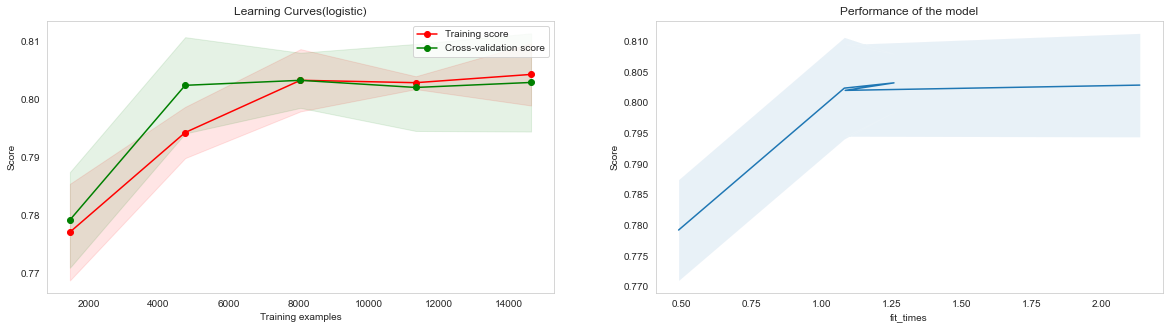

In [95]:
# ANN PCA


xTrainPCA, xTestPCA, yTrainPCA, yTestPCA = train_test_split(pcaData , yData, test_size = 0.3, random_state = 1234,shuffle = True)
clf = MLPClassifier(hidden_layer_sizes=(5,7,5),activation='tanh',learning_rate='constant')
clf2 = MLPClassifier(hidden_layer_sizes=(5,7,5),activation='relu',learning_rate='constant')
clf3 = MLPClassifier(hidden_layer_sizes=(5,7,5),activation='logistic',learning_rate='constant')

learningCurvePlots(clf, xTrainPCA, yTrainPCA, 10, 'tanh')
learningCurvePlots(clf2, xTrainPCA, yTrainPCA, 10, 'relu')
learningCurvePlots(clf3, xTrainPCA, yTrainPCA, 10, 'logistic')


In [96]:
hiddenLayers1 = [(10, 9, 8), (6, 7, 8, 9),(7, 8, 9, 10, 11)]
annData1 = bestLayersAndFunction(hiddenLayers1, 3, xTrainPCA, yTrainPCA)

hiddenLayers2 = [(15, 10, 12), (10, 7, 8, 9), (9, 10, 11)]
annData2 = bestLayersAndFunction(hiddenLayers2, 3, xTrainPCA, yTrainPCA)


<module 'matplotlib.pyplot' from 'c:\\users\\19722\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

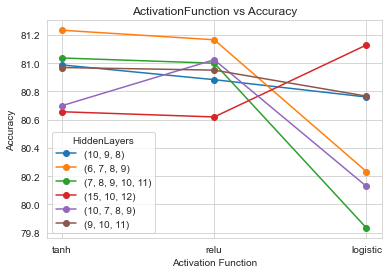

In [97]:
plotActivationVsAccuracy(annData1, hiddenLayers1, 3)
plotActivationVsAccuracy(annData2, hiddenLayers2, 3)

[81.01879666948962, 80.80990995839223, 81.07410376169423]


<module 'matplotlib.pyplot' from 'c:\\users\\19722\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

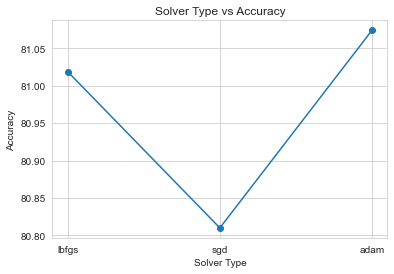

In [100]:
# activation - tanh
# hidden layers - (6, 7, 8, 9) 

@ignore_warnings(category=ConvergenceWarning)
def my_function():
    solverList = ['lbfgs', 'sgd', 'adam']
    accuracyValues = []
    for solverVal in solverList:
        clf = MLPClassifier(hidden_layer_sizes=(6, 7, 8, 9) , activation='tanh', solver = solverVal)
        accuracy = (cross_val_score(clf,xTrainPCA,yTrainPCA,cv=5).mean())*100
        accuracyValues.append(accuracy)
    print(accuracyValues)
    plt.plot(solverList, accuracyValues , '-o')
    plt.ylabel("Accuracy")
    plt.xlabel("Solver Type")
    plt.title("Solver Type vs Accuracy")
    return plt

my_function()

In [106]:
# activation - tanh
# hidden layers - (6, 7, 8, 9) 
# solver - adam

finalClassifier = MLPClassifier(hidden_layer_sizes=(6, 7, 8, 9) , activation='tanh', solver = 'adam')


finalClassifier.fit(xTrainPCA,yTrainPCA)
yPredPCA = finalClassifier.predict(xTestPCA)
error_rate = zero_one_loss(yTestPCA, yPredPCA,normalize = True)
print("Error Rate: "+str(error_rate))
print(confusion_matrix(yPredPCA, yTestPCA))
print(classification_report(yPredPCA, yTestPCA))


Error Rate: 0.19483870967741934
[[5085 1113]
 [ 246  531]]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      6198
           1       0.32      0.68      0.44       777

    accuracy                           0.81      6975
   macro avg       0.64      0.75      0.66      6975
weighted avg       0.88      0.81      0.83      6975



<module 'matplotlib.pyplot' from 'c:\\users\\19722\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

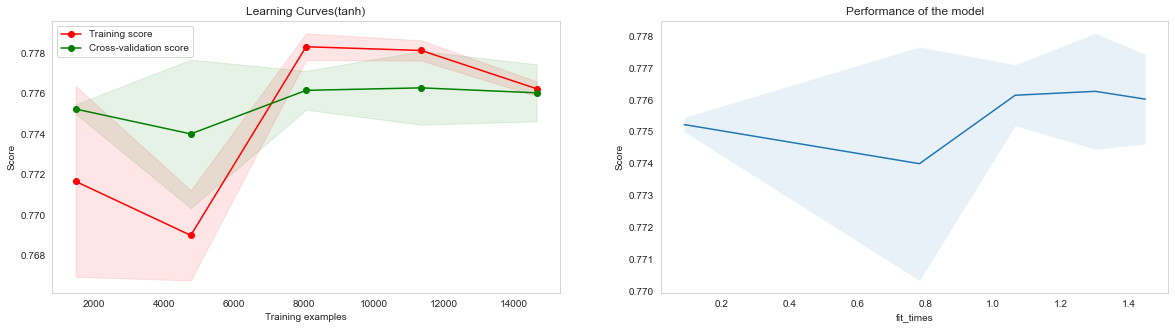

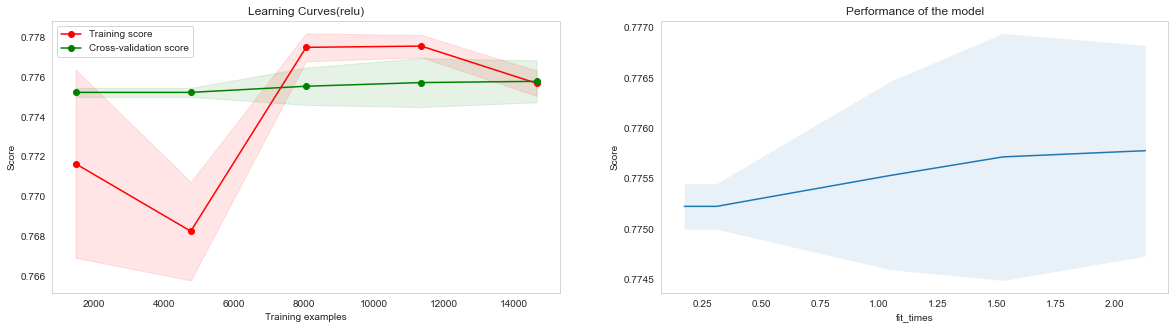

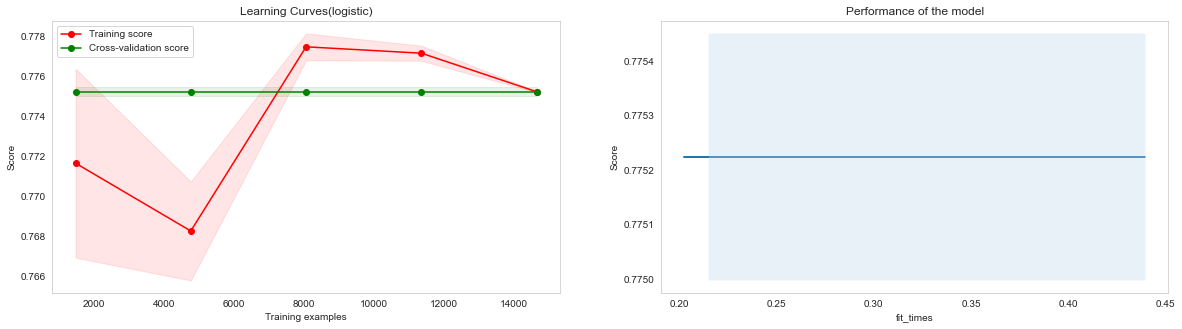

In [107]:
# ANN ICA


xTrainICA, xTestICA, yTrainICA, yTestICA = train_test_split(icaDataFrame , yData, test_size = 0.3, random_state = 1234,shuffle = True)
clf = MLPClassifier(hidden_layer_sizes=(5,7,5),activation='tanh',learning_rate='constant')
clf2 = MLPClassifier(hidden_layer_sizes=(5,7,5),activation='relu',learning_rate='constant')
clf3 = MLPClassifier(hidden_layer_sizes=(5,7,5),activation='logistic',learning_rate='constant')

learningCurvePlots(clf, xTrainICA, yTrainICA, 10, 'tanh')
learningCurvePlots(clf2, xTrainICA, yTrainICA, 10, 'relu')
learningCurvePlots(clf3, xTrainICA, yTrainICA, 10, 'logistic')


In [108]:
hiddenLayers1 = [(10, 9, 8), (6, 7, 8, 9),(7, 8, 9, 10, 11)]
annData1 = bestLayersAndFunction(hiddenLayers1, 3, xTrainICA, yTrainICA)

hiddenLayers2 = [(15, 10, 12), (10, 7, 8, 9), (9, 10, 11)]
annData2 = bestLayersAndFunction(hiddenLayers2, 3, xTrainICA, yTrainICA)


<module 'matplotlib.pyplot' from 'c:\\users\\19722\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

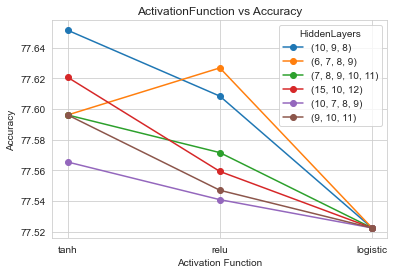

In [109]:
plotActivationVsAccuracy(annData1, hiddenLayers1, 3)
plotActivationVsAccuracy(annData2, hiddenLayers2, 3)

[77.57158812927395, 77.52242920682757, 77.59616570223862]


<module 'matplotlib.pyplot' from 'c:\\users\\19722\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

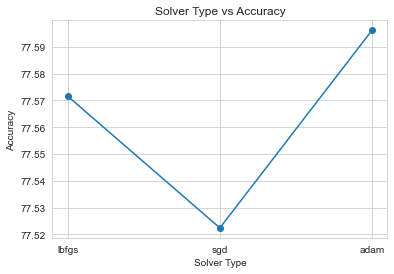

In [111]:
# activation - tanh 
# hidden layers - (10, 9, 8)

@ignore_warnings(category=ConvergenceWarning)
def my_function():
    solverList = ['lbfgs', 'sgd', 'adam']
    accuracyValues = []
    for solverVal in solverList:
        clf = MLPClassifier(hidden_layer_sizes=(10, 9, 8), activation='tanh', solver = solverVal)
        accuracy = (cross_val_score(clf,xTrainICA,yTrainICA,cv=5).mean())*100
        accuracyValues.append(accuracy)
    print(accuracyValues)
    plt.plot(solverList, accuracyValues , '-o')
    plt.ylabel("Accuracy")
    plt.xlabel("Solver Type")
    plt.title("Solver Type vs Accuracy")
    return plt

my_function()

In [112]:
# activation - tanh
# hidden layers - (10, 9, 8)
# solver - adam

finalClassifier = MLPClassifier(hidden_layer_sizes=(10, 9, 8), activation='tanh', solver = 'adam')


finalClassifier.fit(xTrainICA,yTrainICA)
yPredICA = finalClassifier.predict(xTestICA)
error_rate = zero_one_loss(yTestICA, yPredICA,normalize = True)
print("Error Rate: "+str(error_rate))
print(confusion_matrix(yPredICA, yTestICA))
print(classification_report(yPredICA, yTestICA))


Error Rate: 0.23555555555555552
[[5322 1634]
 [   9   10]]
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      6956
           1       0.01      0.53      0.01        19

    accuracy                           0.76      6975
   macro avg       0.50      0.65      0.44      6975
weighted avg       1.00      0.76      0.86      6975



In [193]:
finalData = pd.DataFrame()
finalData[['km_cluster']] = kmDataDT[['Cluster']]
finalData[['em_cluster']] = EMDTData[['Cluster']]
finalData = pd.concat([finalData,yData],axis=1)
finalData = finalData.dropna()

In [194]:
xFinalData = finalData.drop(['Payment'],axis=1)
yFinalData = finalData.iloc[:,2:]

In [198]:
xFinalData['km_cluster'] = ['Cluster 1' if x == 1 else 'Cluster 2' for x in xFinalData['km_cluster']]
xFinalData['em_cluster'] = ['Cluster 1' if x == 1 else 'Cluster 2' for x in xFinalData['em_cluster']]
xFinalDataDummies = pd.get_dummies(xFinalData)

c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\l

c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\l

c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\l

c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\l

c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\l

c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\l

<module 'matplotlib.pyplot' from 'c:\\users\\19722\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

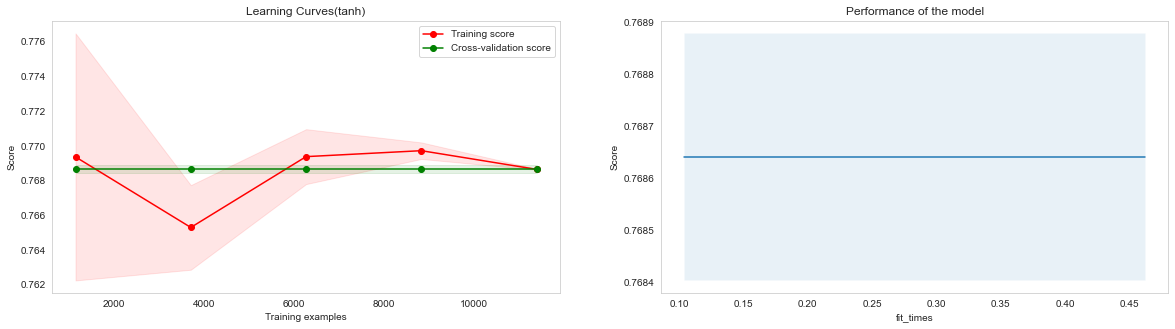

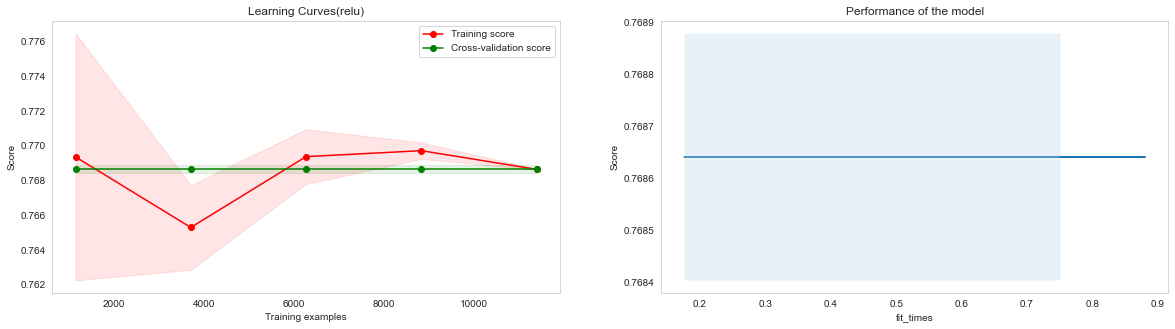

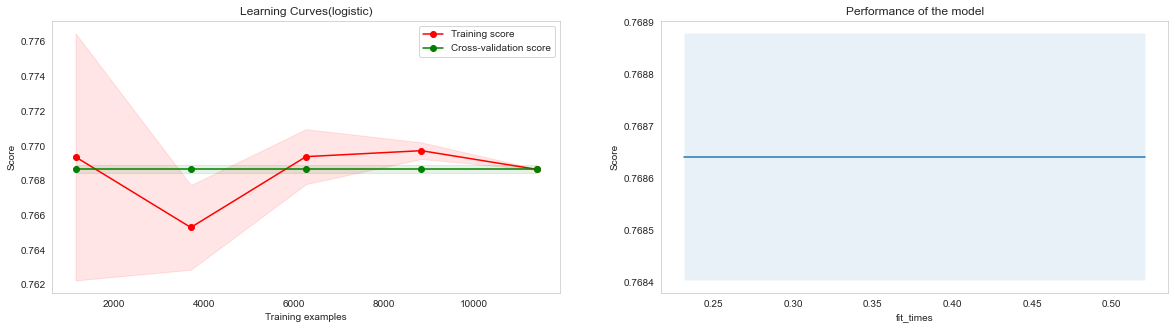

In [199]:
#Final Combination


xTrainFinal, xTestFinal, yTrainFinal, yTestFinal = train_test_split(xFinalDataDummies , yFinalData, test_size = 0.3, random_state = 1234,shuffle = True)
clf = MLPClassifier(hidden_layer_sizes=(5,7,5),activation='tanh',learning_rate='constant')
clf2 = MLPClassifier(hidden_layer_sizes=(5,7,5),activation='relu',learning_rate='constant')
clf3 = MLPClassifier(hidden_layer_sizes=(5,7,5),activation='logistic',learning_rate='constant')

learningCurvePlots(clf, xTrainFinal, yTrainFinal, 10, 'tanh')
learningCurvePlots(clf2, xTrainFinal, yTrainFinal, 10, 'relu')
learningCurvePlots(clf3, xTrainFinal, yTrainFinal, 10, 'logistic')


In [201]:
hiddenLayers1 = [(10, 9, 8), (6, 7, 8, 9),(7, 8, 9, 10, 11)]
annData1 = bestLayersAndFunction(hiddenLayers1, 3, xTrainFinal, yTrainFinal)

hiddenLayers2 = [(15, 10, 12), (10, 7, 8, 9), (9, 10, 11)]
annData2 = bestLayersAndFunction(hiddenLayers2, 3, xTrainFinal, yTrainFinal)


c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\l

c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\l

c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\l

c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\l

<module 'matplotlib.pyplot' from 'c:\\users\\19722\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

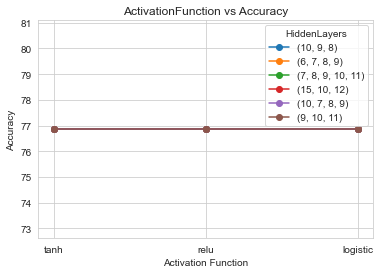

In [202]:
plotActivationVsAccuracy(annData1, hiddenLayers1, 3)
plotActivationVsAccuracy(annData2, hiddenLayers2, 3)

c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\19722\appdata\local\programs\python\python38\l

[76.86413902053714, 76.86413902053714, 76.86413902053714]


<module 'matplotlib.pyplot' from 'c:\\users\\19722\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

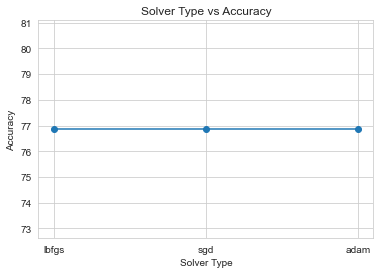

In [204]:
# activation - tanh 
# hidden layers - (15, 10, 12)

@ignore_warnings(category=ConvergenceWarning)
def my_function():
    solverList = ['lbfgs', 'sgd', 'adam']
    accuracyValues = []
    for solverVal in solverList:
        clf = MLPClassifier(hidden_layer_sizes=(15, 10, 12), activation='tanh', solver = solverVal)
        accuracy = (cross_val_score(clf,xTrainFinal,yTrainFinal,cv=5).mean())*100
        accuracyValues.append(accuracy)
    print(accuracyValues)
    plt.plot(solverList, accuracyValues , '-o')
    plt.ylabel("Accuracy")
    plt.xlabel("Solver Type")
    plt.title("Solver Type vs Accuracy")
    return plt

my_function()

In [203]:

finalClassifier = MLPClassifier(hidden_layer_sizes=(15, 10, 12), activation='tanh', solver = 'adam')


finalClassifier.fit(xTrainFinal,yTrainFinal)
yPredFinal = finalClassifier.predict(xTestFinal)
error_rate = zero_one_loss(yTestFinal, yPredFinal,normalize = True)
print("Error Rate: "+str(error_rate))
print(confusion_matrix(yPredFinal, yTestFinal))
print(classification_report(yPredFinal, yTestFinal))


c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Error Rate: 0.22926649465536308
[[4182 1244]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      5426
           1       0.00      0.00      0.00         0

    accuracy                           0.77      5426
   macro avg       0.50      0.39      0.44      5426
weighted avg       1.00      0.77      0.87      5426



c:\users\19722\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
